# PCA 

Principal Component Analysis is a dimensionality reduction technique. This technique is useful when your dataset has a lot of dimensions (variables) which can lead to very complex analysis. PCA aims to reduce the dimensions whilst still capturing maximum variability of the dataset. It can be used to make training of an algorithm faster since less dimensions will be used.

In the following example, we will create a random data set having 5 columns and we try to reduce it to 2 dimensions. Note, we will do this using `np` libraries to calculate various elements, however other libraries like `sklearn` have ready-made functions to calculate PCA automatically.

## PCA from Scratch

### Create Dataset

100 values ranging from 10 to 50 will be created, and converted into a 20 row by 5 column array.

In [1]:
import numpy as np
np.random.seed(120)
X = np.random.randint(10,50,100).reshape(20,5) 
X

array([[49, 10, 40, 41, 20],
       [30, 33, 43, 29, 34],
       [30, 48, 24, 23, 35],
       [43, 14, 47, 17, 44],
       [12, 42, 38, 36, 25],
       [14, 44, 23, 44, 30],
       [18, 16, 43, 25, 10],
       [49, 47, 33, 34, 44],
       [27, 19, 37, 31, 40],
       [16, 47, 33, 34, 33],
       [14, 18, 21, 19, 17],
       [47, 16, 10, 47, 18],
       [32, 20, 34, 30, 11],
       [24, 24, 14, 40, 21],
       [41, 49, 11, 40, 31],
       [31, 38, 18, 35, 12],
       [32, 37, 32, 14, 46],
       [22, 18, 37, 36, 36],
       [20, 33, 13, 46, 31],
       [24, 45, 43, 32, 31]])

### Finding the Mean

The next step is to subtract each number by the mean of its column.

In [2]:
X_meaned = X - np.mean(X , axis = 0)
X_meaned

array([[ 20.25, -20.9 ,  10.3 ,   8.35,  -8.45],
       [  1.25,   2.1 ,  13.3 ,  -3.65,   5.55],
       [  1.25,  17.1 ,  -5.7 ,  -9.65,   6.55],
       [ 14.25, -16.9 ,  17.3 , -15.65,  15.55],
       [-16.75,  11.1 ,   8.3 ,   3.35,  -3.45],
       [-14.75,  13.1 ,  -6.7 ,  11.35,   1.55],
       [-10.75, -14.9 ,  13.3 ,  -7.65, -18.45],
       [ 20.25,  16.1 ,   3.3 ,   1.35,  15.55],
       [ -1.75, -11.9 ,   7.3 ,  -1.65,  11.55],
       [-12.75,  16.1 ,   3.3 ,   1.35,   4.55],
       [-14.75, -12.9 ,  -8.7 , -13.65, -11.45],
       [ 18.25, -14.9 , -19.7 ,  14.35, -10.45],
       [  3.25, -10.9 ,   4.3 ,  -2.65, -17.45],
       [ -4.75,  -6.9 , -15.7 ,   7.35,  -7.45],
       [ 12.25,  18.1 , -18.7 ,   7.35,   2.55],
       [  2.25,   7.1 , -11.7 ,   2.35, -16.45],
       [  3.25,   6.1 ,   2.3 , -18.65,  17.55],
       [ -6.75, -12.9 ,   7.3 ,   3.35,   7.55],
       [ -8.75,   2.1 , -16.7 ,  13.35,   2.55],
       [ -4.75,  14.1 ,  13.3 ,  -0.65,   2.55]])

### Covariance Matrix

The covariance matrix is a square matrix denoting the covariance of elements against each other. It is used to determine the relationship between the movements of two random variables evaluating how they change together. If the result is a high value if means they are closes related and vary together.

In [3]:
# setting rowvar False will compare each column with all the other columns
cov_mat = np.cov(X_meaned , rowvar = False)
print(cov_mat)

[[142.09210526 -28.55263158  -3.34210526   6.27631579  24.11842105]
 [-28.55263158 186.09473684 -33.34736842  12.22631579  52.94210526]
 [ -3.34210526 -33.34736842 142.64210526 -54.58421053  34.93157895]
 [  6.27631579  12.22631579 -54.58421053  88.23947368 -28.09736842]
 [ 24.11842105  52.94210526  34.93157895 -28.09736842 125.94473684]]


From the above table the first value 142 is colum 1 against itself, then you can see that it has the highest covariance with two columns column 2 (`-28.55`) and column 5 (`24.12`).

### Eigenvalues and Eigenvectors

After we calculate the covariance matrix, we need to compute the Eigenvalues, and Eigenvectors. 
- **Eigenvectors** are the directions along which your data stretches the most, and they become the new axes for representing your data. 
- **Eigenvalues** tell you how important each new direction is – the bigger the eigenvalue, the more of your data's variation is explained along that direction.

In [4]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print ('Eigen Values')
print(eigen_values)
print ('\nEigen Vectors')
print(eigen_vectors)

Eigen Values
[ 51.53603523  55.35760083 152.17659551 202.32527456 223.61765176]

Eigen Vectors
[[-0.30113301  0.20807098  0.90502471 -0.0754528  -0.20313181]
 [-0.33338002  0.3245421  -0.00573358 -0.17773322  0.86712641]
 [ 0.06284797  0.63016495 -0.25516091 -0.64386956 -0.34535079]
 [ 0.68885689  0.53112298  0.17818267  0.43280093  0.15594506]
 [ 0.56542285 -0.41494507  0.28989869 -0.60069387  0.25148205]]


Next step is to sort the Eigenvalues in the descending order along with their corresponding Eigenvector. This will result in having a matrix where the principal component that captures the highest variability is first.

In [5]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]

#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

print("Sorted Eigenvectors")
print(sorted_eigenvectors)
print("\nSorted Eigenvalues")
print(sorted_eigenvalue)

Sorted Eigenvectors
[[-0.20313181 -0.0754528   0.90502471  0.20807098 -0.30113301]
 [ 0.86712641 -0.17773322 -0.00573358  0.3245421  -0.33338002]
 [-0.34535079 -0.64386956 -0.25516091  0.63016495  0.06284797]
 [ 0.15594506  0.43280093  0.17818267  0.53112298  0.68885689]
 [ 0.25148205 -0.60069387  0.28989869 -0.41494507  0.56542285]]

Sorted Eigenvalues
[223.61765176 202.32527456 152.17659551  55.35760083  51.53603523]


### Selecting Number of Components

Next, we need to choose the number of components that we will use. In this case we will pick 2, this means that our dataset will be reduced to 2 variables.

In [6]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print(eigenvector_subset)

[[-0.20313181 -0.0754528 ]
 [ 0.86712641 -0.17773322]
 [-0.34535079 -0.64386956]
 [ 0.15594506  0.43280093]
 [ 0.25148205 -0.60069387]]


### Transforming the Data

The last step is to transform the data with the chosen Eigenvectors. 

In [7]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
X_reduced

array([[-26.61635638,   4.24459947],
       [ -2.19958891, -13.94459527],
       [ 16.68478398,  -7.57457133],
       [-22.05362766, -25.32457863],
       [  9.81595231,  -2.53084467],
       [ 18.82917413,   7.07976477],
       [-21.16250567,   2.66775219],
       [ 12.8287302 , -15.27070201],
       [ -9.83707607, -10.10531581],
       [ 16.76577737,  -6.17312698],
       [-10.19330422,   9.97756465],
       [-10.21410429,  26.44338589],
       [-16.39848088,   8.25861691],
       [ -0.32363381,  19.34976825],
       [ 21.45215861,   9.54841016],
       [  5.96974636,  17.00009552],
       [  5.3401205 , -21.42420893],
       [ -9.91474633,  -4.98353846],
       [ 12.08887282,  15.28571695],
       [  9.13810793, -12.52419268]])

That's it now, we have reduced our dataset to just two variables.

## Bringing it all Together

Now, we can create a function that calculates the PCA based on a number of components.

In [8]:
import numpy as np
 
def PCA(X , num_components):
    X_meaned = X - np.mean(X , axis = 0)
    covariance_matrix = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)
     
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

### Application of our PCA

Finally, we can apply our PCA function on an existing dataset. We will use the iris dataset which is a very common one used in machine learning examples.

#### Get Iris Data

In [9]:
import pandas as pd
 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

C:\Users\alang\AppData\Local\Temp\ipykernel_25352\3731027033.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Extract Numerical Values and Target

We will create another dataset with only numerical values excluding the target. Then we copy the target to a new variable.

In [10]:
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]

# print first two rows of each
print("Dataset")
print (x[0:2:])
print("\nTarget")
print (target[0:2:])

Dataset
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

Target
0    Iris-setosa
1    Iris-setosa
Name: target, dtype: object


#### Create PCA 

The next step is to get the dataset, and extract a PCA with 2 components.

In [11]:
matrix_reduced = PCA(x , 2)

#### Testing Result

Now, we're combining PCA result, and targets back to a dataframe so that we can plot it later on.

In [12]:
principal_df = pd.DataFrame(matrix_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
principal_df.head()

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa


#### Extract Colors for Targets

We will find the unique targets, so that we can assign a colour for each.

In [13]:
colours = list(set(data["target"]))
print(colours)

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']


#### Plot PCs

Last step is to plot each PCA against each other using a scatter plot. This will be done by each target (each target will have a different colour).

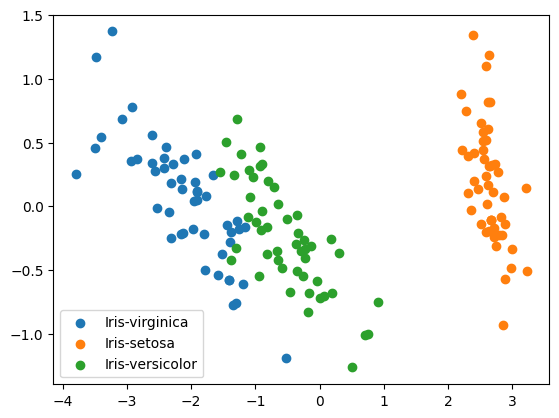

In [14]:
import matplotlib.pyplot as plt

for i in colours:
    idx = principal_df.where(target==i)
    plt.scatter(data = idx , x = 'PC1',y = 'PC2', label=i)
plt.legend()

#### Outcome

You can observe from the scatter plot, that each group is clearly still distinguishable, hence two dimensions are enough to identify the target.